In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [9]:
df = pd.read_csv('df.csv', sep=',', encoding='utf-8',index_col=[0])

# Partie 2 - Analyse des données

### Variables qualitatives

In [10]:
df.head(5)

,code,product_name,brands,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,labels_fr,ingredients_from_palm_oil_n,additives_n
228574,3366321050849,"St Hubert Oméga 3 (Sel de Mer, Tartine et Cuis...","St Hubert,St Hubert Oméga 3",d,2004.0,54.00,15.40,0.1,0.10,0.00,0.10,1.2700,14,labeled,0,3
245361,3596710303953,Assortiment de bouchées vapeur,"Auchan,L'oiseau,Auchan Production,Groupe Auchan",c,740.0,6.50,1.70,22.7,5.50,1.60,5.90,1.3500,4,labeled,0,5
245362,3596710304363,Terrine de canard au poivre vert,Auchan,e,975.0,18.60,7.40,2.0,2.00,0.00,14.30,10.8600,19,labeled,0,1
245363,3596710304387,Tagliatelles Saumon,"L'oiseau,Auchan,Auchan Production,Groupe Auchan",c,902.0,14.20,8.00,13.6,2.00,0.80,8.20,0.5588,10,labeled,0,4
245364,3596710304448,Lasagne Bolognaise,Auchan,b,489.0,3.59,2.03,13.6,1.09,1.59,6.59,1.1100,1,labeled,0,4


In [11]:
df[['code','product_name','brands','nutrition_grade_fr','labels_fr']] = df[['code','product_name','brands','nutrition_grade_fr','labels_fr']].astype('string')
df[['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']] = df[['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']].astype('float64')
df[['additives_n','nutrition-score-fr_100g','ingredients_from_palm_oil_n']] = df[['additives_n','nutrition-score-fr_100g','ingredients_from_palm_oil_n']].astype('int64')

In [12]:
df.describe(include=['string'])

,code,product_name,brands,nutrition_grade_fr,labels_fr
count,59698,59698,59698,59698,59698
unique,59698,49926,12313,5,2
top,3366321050849,Mayonnaise,Carrefour,d,no_label
freq,1,41,2307,16541,32612


In [13]:
df['product_name'].value_counts()

Mayonnaise                                       41
Huile d'olive vierge extra                       40
Orange                                           39
Tomato Ketchup                                   38
Moutarde de Dijon                                33
                                                 ..
Confiture Ananas Pina Colada                      1
Confiture de Fraises                              1
Eistee, Ice Tea Herbs                             1
140G Dessert Fruit Mirabelle / Pomme Bergam's     1
Oasis Pocket Cassis Framboise                     1
Name: product_name, Length: 49926, dtype: Int64

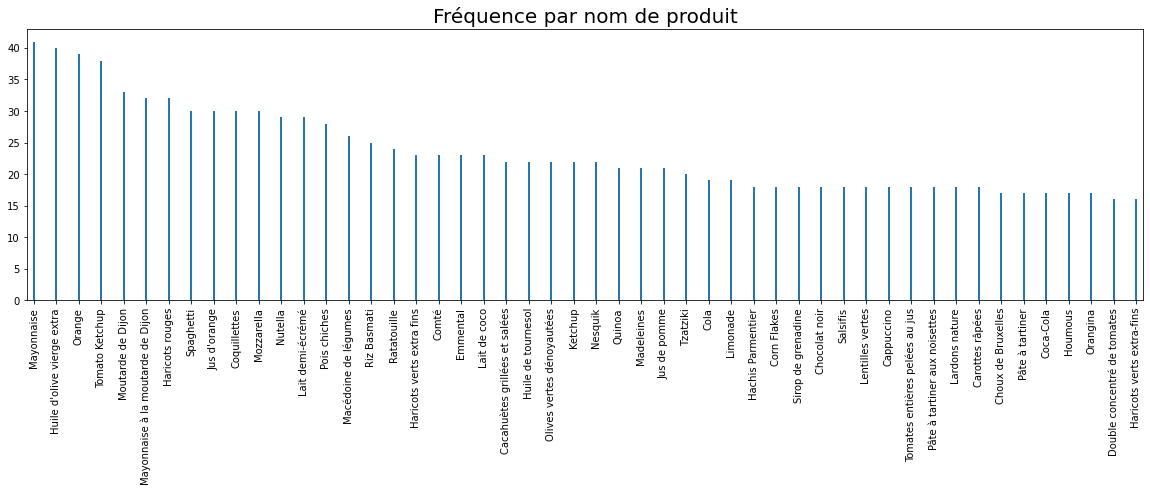

In [14]:
# Diagramme en bâtons
plt.figure(figsize=(20, 5))
plt.title("Fréquence par nom de produit", fontsize=20)
data=df['product_name'].value_counts().head(50).plot(kind='bar',width=0.1)
plt.show()

In [15]:
df['brands'].value_counts()

Carrefour             2307
Auchan                1856
U                     1681
Leader Price          1332
Casino                1250
                      ... 
L'italie Des Pates       1
Abc                      1
E Leclerc                1
Ducale                   1
Le Bon Bresse            1
Name: brands, Length: 12313, dtype: Int64

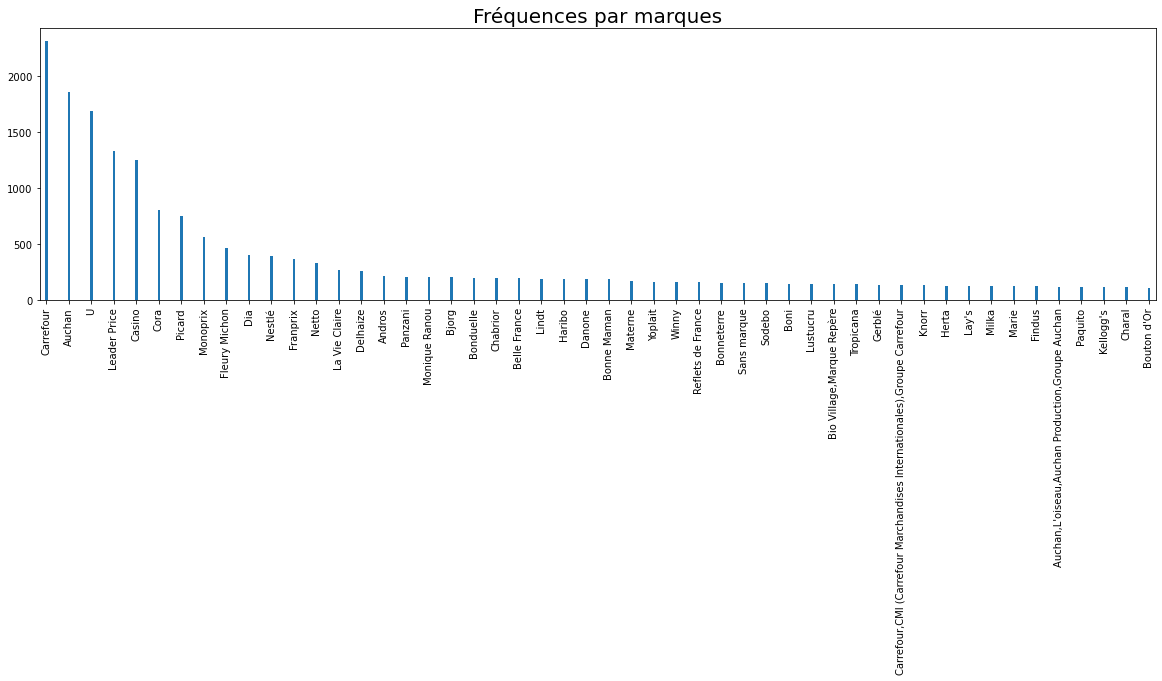

In [16]:
# Diagramme en bâtons
plt.figure(figsize=(20, 5))
plt.title("Fréquences par marques", fontsize=20)
data=df['brands'].value_counts().head(50).plot(kind='bar',width=0.1)
plt.show()

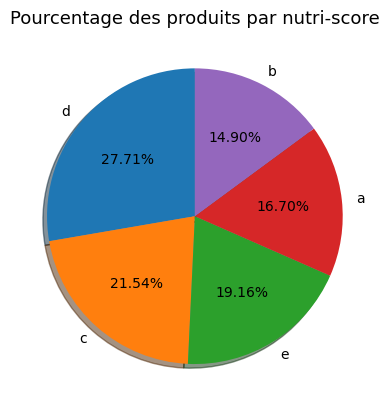

In [17]:
plt.style.use('default')
momo=df['nutrition_grade_fr'].value_counts().copy()
plt.title("Pourcentage des produits par nutri-score", fontsize=13)
plt.rcParams["figure.figsize"]=[5,5]
plt.pie(momo.values, labels=["d","c","e","a","b"],autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
#plt.savefig("8.jpg")
plt.show()

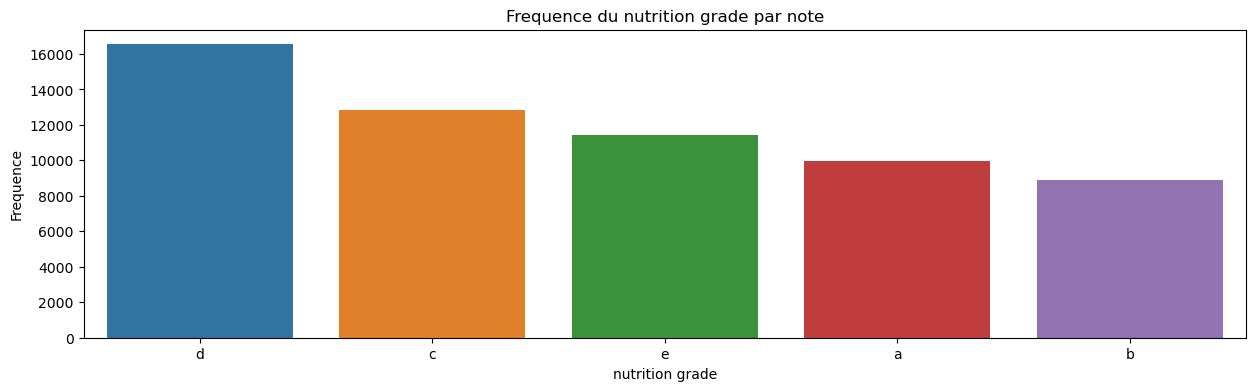

In [18]:
#répartition des nutrigrades
sns.reset_defaults()
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
comptage = df['nutrition_grade_fr'].value_counts()
sns.barplot(x=comptage.index, y=comptage.values)
plt.title("Frequence du nutrition grade par note")
plt.xlabel("nutrition grade")
plt.ylabel("Frequence")
#plt.savefig("9.jpg")
plt.show()

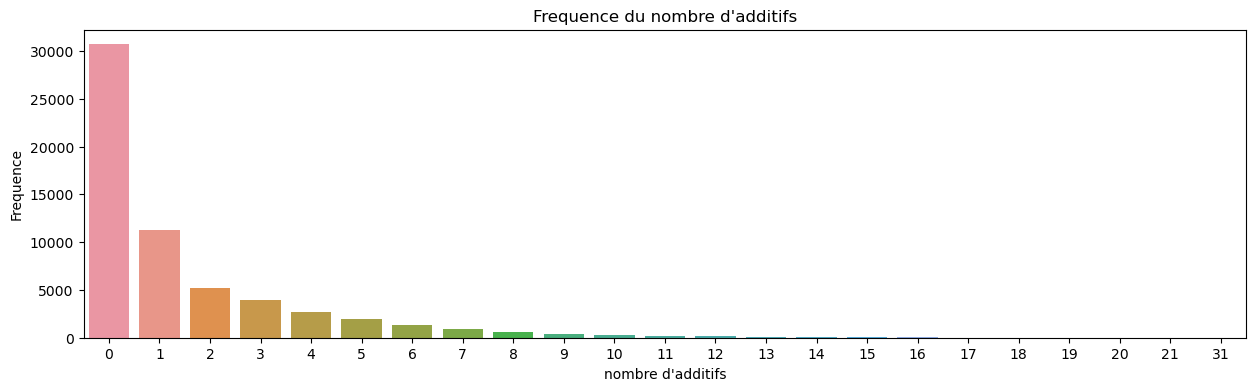

In [19]:
#répartition des nutrigrades
sns.reset_defaults()
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
comptage = df['additives_n'].value_counts()
sns.barplot(x=comptage.index, y=comptage.values)
plt.title("Frequence du nombre d'additifs")
plt.xlabel("nombre d'additifs")
plt.ylabel("Frequence")
#plt.savefig("10.jpg")
plt.show()

(array([0, 1]), [Text(0, 0, 'no_label'), Text(1, 0, 'labeled')])

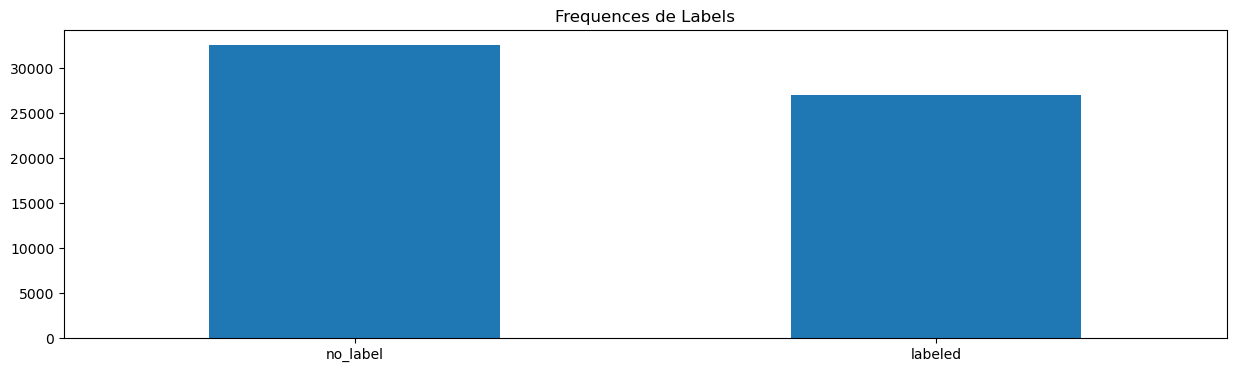

In [20]:
sns.reset_defaults()
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df['labels_fr'].value_counts().plot(kind='bar')
plt.title("Frequences de Labels")
plt.xticks(rotation = 0)
#plt.savefig("11.jpg");

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

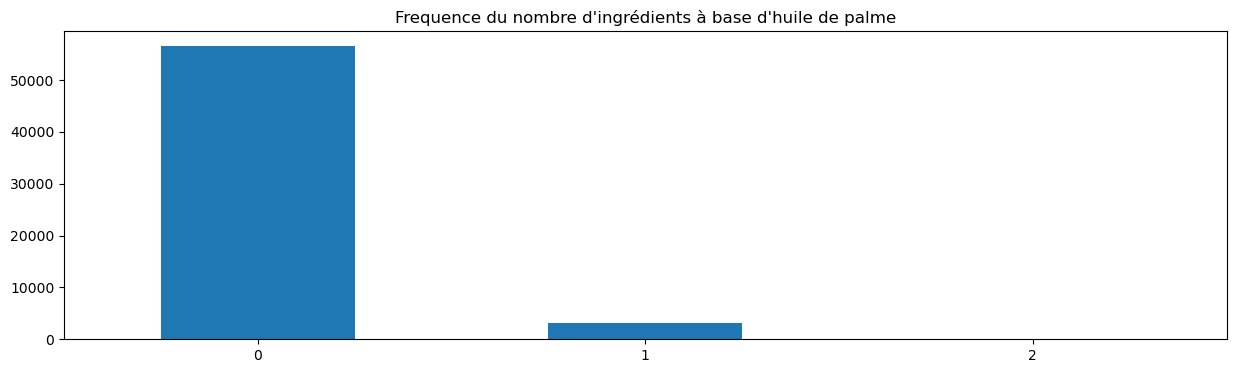

In [21]:
sns.reset_defaults()
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df['ingredients_from_palm_oil_n'].value_counts().plot(kind='bar')
plt.title("Frequence du nombre d'ingrédients à base d'huile de palme")
plt.xticks(rotation = 0)
#plt.savefig("12.jpg");

Text(0, 0.5, 'Frequence')

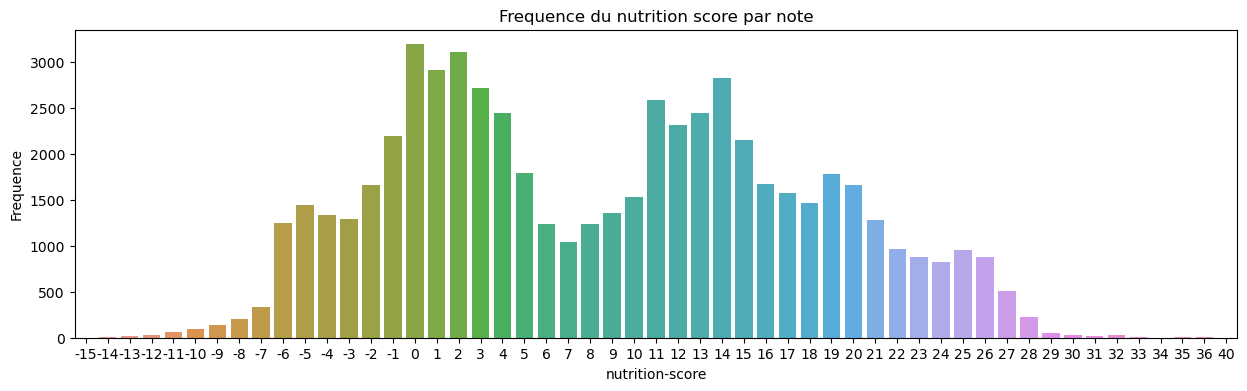

In [22]:
#répartition des nutriscore
sns.reset_defaults()
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
comptage = df['nutrition-score-fr_100g'].value_counts()
sns.barplot(x=comptage.index, y=comptage.values)
plt.title("Frequence du nutrition score par note")
plt.xlabel("nutrition-score")
plt.ylabel("Frequence")
#plt.savefig("13.jpg");

### Variables quantitatives

In [23]:
df.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,ingredients_from_palm_oil_n,additives_n
count,59698.000000,43126.000000,59698.000000,43075.000000,59698.000000,43446.000000,59698.000000,59698.000000,59698.000000,59698.000000,59698.000000
mean,1117.074747,13.325059,5.442879,27.657283,13.312217,2.519176,7.765165,1.077638,8.665701,0.053235,1.451539
std,771.305599,16.667821,8.510855,27.227545,18.997108,4.470946,7.832324,3.727829,9.042082,0.227689,2.330659
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,434.000000,1.400000,0.300000,4.100000,1.000000,0.000000,1.900000,0.080000,1.000000,0.000000,0.000000
50%,1038.000000,7.000000,2.000000,14.500000,4.000000,1.300000,6.000000,0.558800,9.000000,0.000000,0.000000
75%,1653.000000,21.000000,7.500000,53.000000,17.300000,3.200000,10.900000,1.244600,15.000000,0.000000,2.000000
max,3768.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,2.000000,31.000000


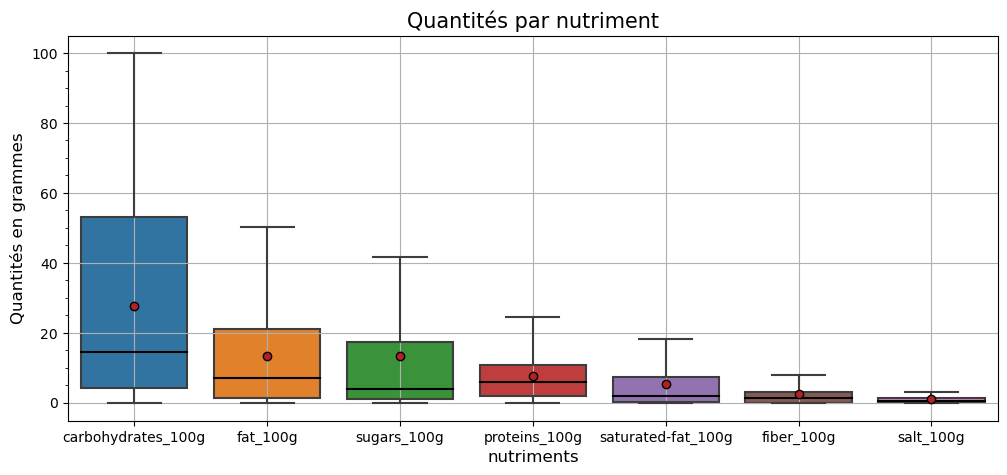

In [24]:
temp = pd.melt(df.select_dtypes(include=['float64']).drop(['energy_100g'],axis=1)).dropna()
ordre = df.select_dtypes(include=['float64']).drop(['energy_100g'],axis=1).mean().sort_values(ascending = False).index
plt.figure(figsize=(12,5))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

sns.boxplot(x="variable", y="value",showfliers=False, medianprops=medianprops, 
             order = ordre, showmeans=True, meanprops=meanprops,data=temp)

plt.title("Quantités par nutriment", fontsize=15)
plt.xlabel("nutriments",color="k",fontsize=12)
plt.ylabel("Quantités en grammes",color="k",fontsize=12)
plt.gca().yaxis.set_ticks(range(0, 100,5), minor = True)
plt.grid(True)
plt.draw()
#plt.savefig("14.jpg")

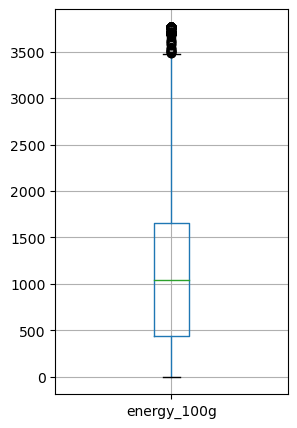

In [25]:
plt.figure(figsize=(3, 5))

df.boxplot('energy_100g');
#plt.savefig("15.jpg")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'nutrition-score-fr_100g'),
  Text(1.5, 0, 'energy_100g'),
  Text(2.5, 0, 'fat_100g'),
  Text(3.5, 0, 'saturated-fat_100g'),
  Text(4.5, 0, 'carbohydrates_100g'),
  Text(5.5, 0, 'sugars_100g'),
  Text(6.5, 0, 'fiber_100g'),
  Text(7.5, 0, 'proteins_100g'),
  Text(8.5, 0, 'salt_100g'),
  Text(9.5, 0, 'additives_n'),
  Text(10.5, 0, 'ingredients_from_palm_oil_n')])

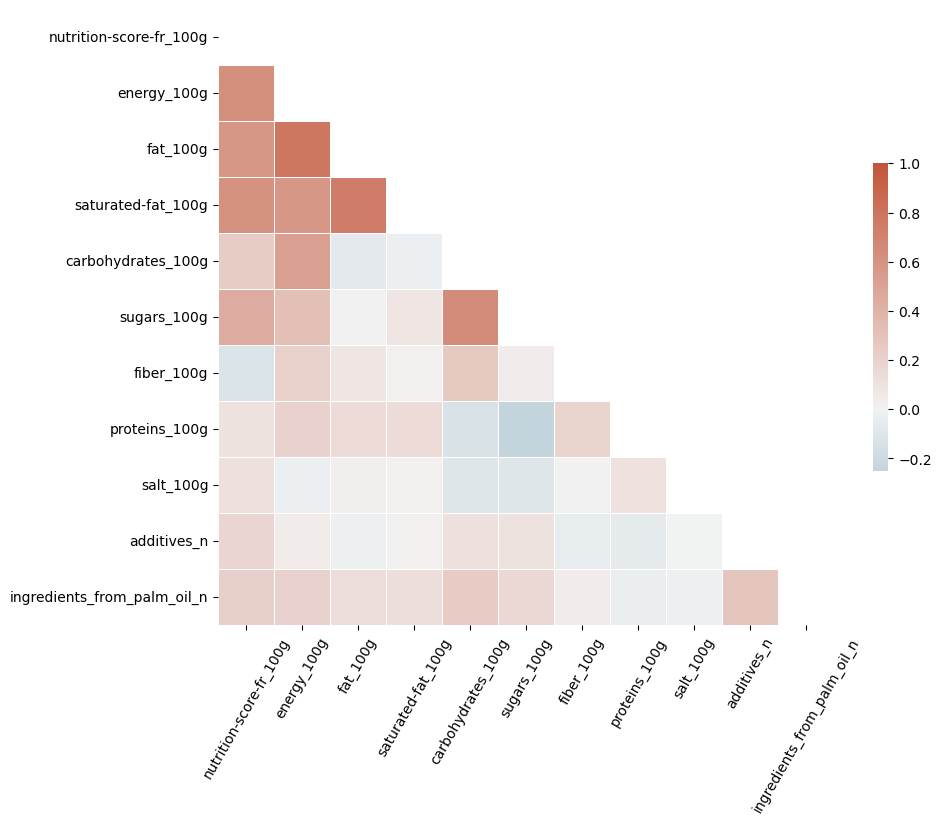

In [26]:
# Compute the correlation matrix
corr = df[['nutrition-score-fr_100g','energy_100g','fat_100g','saturated-fat_100g',
           'carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','additives_n','ingredients_from_palm_oil_n']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.xticks(rotation = 60)
#plt.savefig("16.jpg");

## Entre 2 variables quantitatives

### "carbohydrates_100g" et "energy_100g"

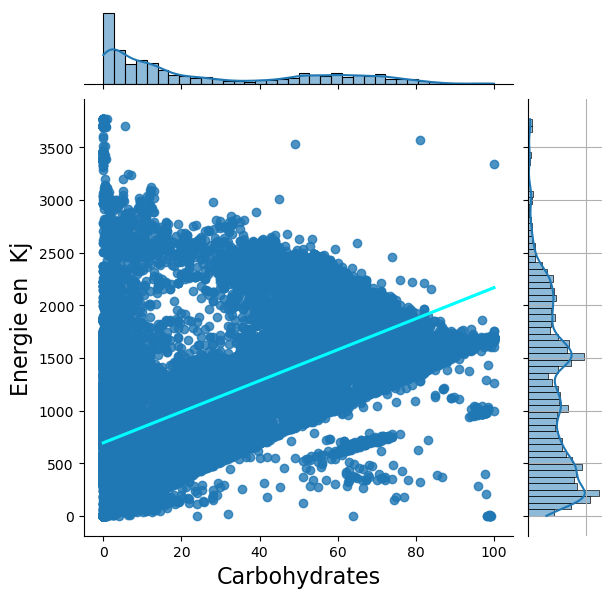

In [27]:
sns.reset_defaults()
h = sns.jointplot(x='carbohydrates_100g',y='energy_100g',data=df, kind="reg",
                  joint_kws={'line_kws':{'color':'cyan'}} )

h.set_axis_labels('Carbohydrates', 'Energie en  Kj', fontsize=16)

plt.grid(True)
#plt.savefig("17.jpg")
plt.show()

In [28]:
import scipy.stats as st
import numpy as np
temp=df[['carbohydrates_100g','energy_100g']].dropna().copy()
print(st.pearsonr(temp["carbohydrates_100g"],temp["energy_100g"])[0])
print(np.cov(temp["carbohydrates_100g"],temp["energy_100g"],ddof=0)[1,0])

0.5247817780841538
10923.392577572171


### "fat_100g" et "energy_100g"

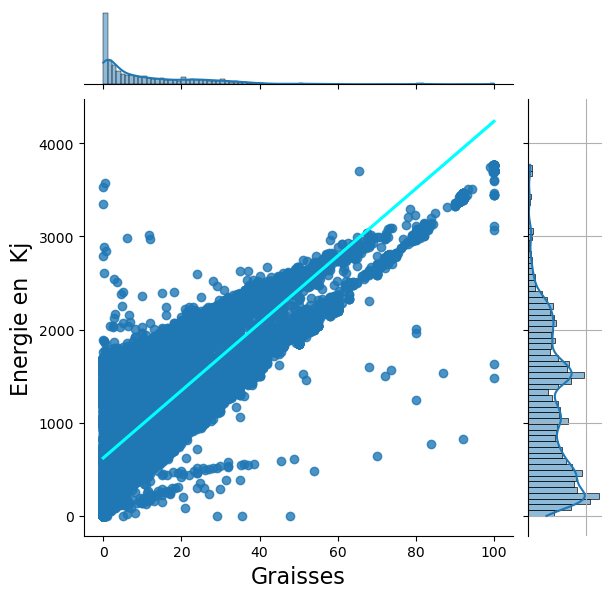

In [29]:
sns.reset_defaults()
h = sns.jointplot(x='fat_100g',y='energy_100g',data=df, kind="reg",
                  joint_kws={'line_kws':{'color':'cyan'}} )

h.set_axis_labels('Graisses', 'Energie en  Kj', fontsize=16)

plt.grid(True)
#plt.savefig("18.jpg")
plt.show()

In [30]:
import scipy.stats as st
import numpy as np
temp=df[['fat_100g','energy_100g']].dropna().copy()
print(st.pearsonr(temp["fat_100g"],temp["energy_100g"])[0])
print(np.cov(temp["fat_100g"],temp["energy_100g"],ddof=0)[1,0])

0.7866063374321989
10038.085464217009


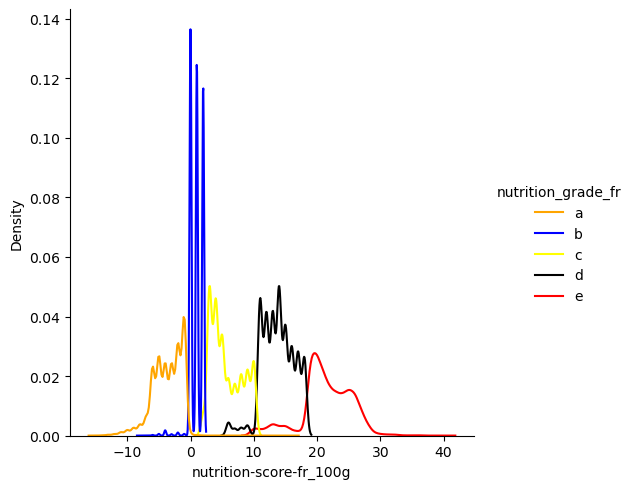

In [67]:
sns.displot(data=df, x="nutrition-score-fr_100g", hue="nutrition_grade_fr", kind="kde", log_scale=False)
#plt.savefig("19.jpg");

In [32]:
import scipy.stats as st
import numpy as np
temp=df.copy()
temp.nutrition_grade_fr.replace(['a', 'b', 'c', 'd', 'e'], ['1','2','3','4','5'], inplace=True)
temp.nutrition_grade_fr = temp.nutrition_grade_fr.astype('int')
#temp=df.dropna().copy()
print(st.pearsonr(temp["nutrition_grade_fr"],temp["nutrition-score-fr_100g"])[0])
print(np.cov(temp["nutrition_grade_fr"],temp["nutrition-score-fr_100g"],ddof=0)[1,0])

0.9458749038327486
11.566013859034111


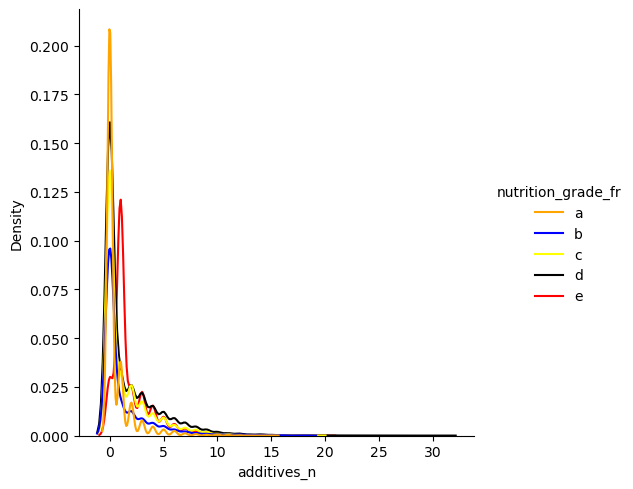

In [68]:
sns.displot(data=df, x="additives_n", hue="nutrition_grade_fr", kind="kde", log_scale=False)
#plt.savefig("20.jpg");

In [34]:
import scipy.stats as st
import numpy as np
temp=df.copy()
temp.nutrition_grade_fr.replace(['a', 'b', 'c', 'd', 'e'], ['1','2','3','4','5'], inplace=True)
temp.nutrition_grade_fr = temp.nutrition_grade_fr.astype('int')
#temp=df.dropna().copy()
print(st.pearsonr(temp["nutrition_grade_fr"],temp["nutrition-score-fr_100g"])[0])
print(np.cov(temp["nutrition_grade_fr"],temp["nutrition-score-fr_100g"],ddof=0)[1,0])

0.9458749038327486
11.566013859034111


## Entre 1 variable qualitative et une variable quantitative

### "fat_100g" et "nutrition_grade_fr"

In [35]:
for cat in df['nutrition_grade_fr'].sort_values().unique():
    subset = df[df.nutrition_grade_fr == cat]
    print("-"*20)
    print("Pour les Nutri-grade ",(cat),".")
    print ("Nombre de produits:",len(subset['nutrition_grade_fr']),".")
    print("Quantité moyenne: ",round(subset['fat_100g'].mean(),2))
    print("Quantité médiane ",round(subset['fat_100g'].median(),2))
    print("Mode: ",round(subset['fat_100g'].mode()[0],2))
    print("Ecart-type: ",round(subset['fat_100g'].std(ddof=0),2))

--------------------
Pour les Nutri-grade  a .
Nombre de produits: 9967 .
Quantité moyenne:  2.79
Quantité médiane  1.6
Mode:  0.5
Ecart-type:  4.38
--------------------
Pour les Nutri-grade  b .
Nombre de produits: 8894 .
Quantité moyenne:  4.31
Quantité médiane  2.9
Mode:  0.0
Ecart-type:  5.36
--------------------
Pour les Nutri-grade  c .
Nombre de produits: 12858 .
Quantité moyenne:  9.08
Quantité médiane  5.2
Mode:  0.0
Ecart-type:  13.26
--------------------
Pour les Nutri-grade  d .
Nombre de produits: 16541 .
Quantité moyenne:  19.45
Quantité médiane  16.05
Mode:  0.0
Ecart-type:  18.35
--------------------
Pour les Nutri-grade  e .
Nombre de produits: 11438 .
Quantité moyenne:  25.92
Quantité médiane  25.4
Mode:  0.0
Ecart-type:  18.44


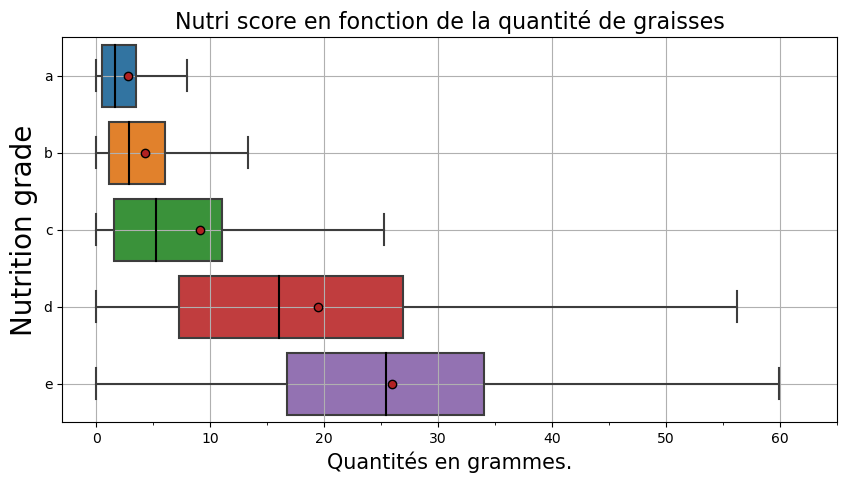

In [36]:
ordre = df.groupby('nutrition_grade_fr')['fat_100g'].median().sort_values().index

plt.figure(figsize=(10,5))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

sns.boxplot(x="fat_100g",
            y="nutrition_grade_fr",
            showfliers=False, medianprops=medianprops, 
             showmeans=True, meanprops=meanprops,
            orient='h', 
            order=ordre, 
            data=df);

plt.title("Nutri score en fonction de la quantité de graisses", fontsize=16)
plt.xlabel("Quantités en grammes.",color="k",fontsize=15)
plt.ylabel("Nutrition grade",color="k",fontsize=20)
plt.gca().xaxis.set_ticks(range(0, 70,5), minor = True)
plt.grid(True)
plt.draw()
#plt.savefig("21.jpg")

In [37]:
X = "nutrition_grade_fr" # qualitative
Y = "fat_100g" # quantitative
temp = df[["nutrition_grade_fr","fat_100g"]].dropna()
sous_echantillon = temp.sort_values(by="nutrition_grade_fr").dropna().copy()

In [38]:
X = "nutrition_grade_fr" # qualitative
Y = "fat_100g" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("L'éta-carré (η2) est de ",eta_squared(sous_echantillon[X],sous_echantillon[Y]))#Les variables ne sont pas corrélées

L'éta-carré (η2) est de  0.2711485781274317


In [39]:
df.columns

Index(['code', 'product_name', 'brands', 'nutrition_grade_fr', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g',
       'labels_fr', 'ingredients_from_palm_oil_n', 'additives_n'],
      dtype='object')

In [40]:
#On obtient un résultat proche de 0.27, il n'y a pas de corrélation flagrante

### "proteins_100g" et "nutrition_grade_fr"

In [41]:
for cat in df['nutrition_grade_fr'].sort_values().unique():
    subset = df[df.nutrition_grade_fr == cat]
    print("-"*20)
    print("Pour les Nutri-grade ",(cat),".")
    print ("Nombre de produits:",len(subset['nutrition_grade_fr']),".")
    print("Quantité moyenne: ",round(subset['proteins_100g'].mean(),2))
    print("Quantité médiane ",round(subset['proteins_100g'].median(),2))
    print("Mode: ",round(subset['proteins_100g'].mode()[0],2))
    print("Ecart-type: ",round(subset['proteins_100g'].std(ddof=0),2))

--------------------
Pour les Nutri-grade  a .
Nombre de produits: 9967 .
Quantité moyenne:  7.82
Quantité médiane  6.9
Mode:  12.0
Ecart-type:  7.18
--------------------
Pour les Nutri-grade  b .
Nombre de produits: 8894 .
Quantité moyenne:  5.94
Quantité médiane  3.7
Mode:  0.0
Ecart-type:  7.16
--------------------
Pour les Nutri-grade  c .
Nombre de produits: 12858 .
Quantité moyenne:  7.04
Quantité médiane  4.8
Mode:  0.5
Ecart-type:  7.42
--------------------
Pour les Nutri-grade  d .
Nombre de produits: 16541 .
Quantité moyenne:  9.24
Quantité médiane  6.9
Mode:  0.0
Ecart-type:  8.71
--------------------
Pour les Nutri-grade  e .
Nombre de produits: 11438 .
Quantité moyenne:  7.81
Quantité médiane  6.2
Mode:  0.0
Ecart-type:  7.57


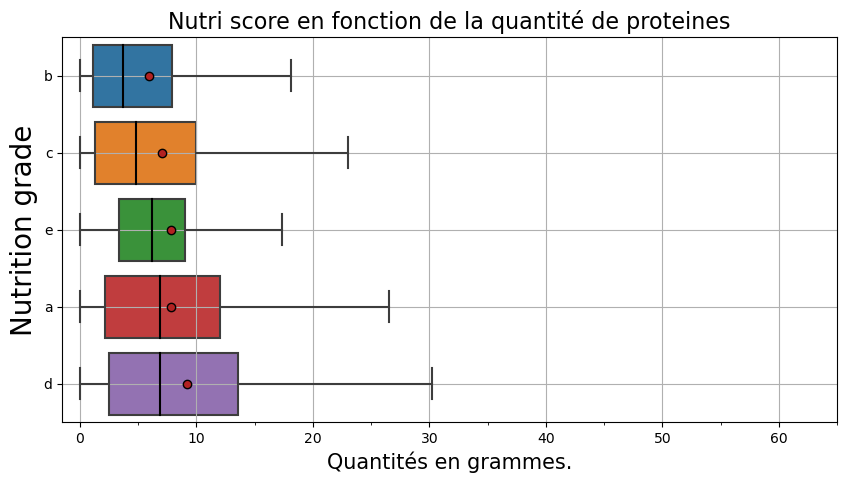

In [42]:
ordre = df.groupby('nutrition_grade_fr')['proteins_100g'].median().sort_values().index

plt.figure(figsize=(10,5))

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

sns.boxplot(x="proteins_100g",
            y="nutrition_grade_fr",
            showfliers=False, medianprops=medianprops, 
             showmeans=True, meanprops=meanprops,
            orient='h', 
            order=ordre, 
            data=df);

plt.title("Nutri score en fonction de la quantité de proteines", fontsize=16)
plt.xlabel("Quantités en grammes.",color="k",fontsize=15)
plt.ylabel("Nutrition grade",color="k",fontsize=20)
plt.gca().xaxis.set_ticks(range(0, 70,5), minor = True)
plt.grid(True)
plt.draw()
#plt.savefig("22.jpg")

In [43]:
X = "nutrition_grade_fr" # qualitative
Y = "proteins_100g" # quantitative
temp = df[["nutrition_grade_fr","proteins_100g"]].dropna()
sous_echantillon = temp.sort_values(by="nutrition_grade_fr").dropna().copy()

In [44]:
X = "nutrition_grade_fr" # qualitative
Y = "proteins_100g" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("L'éta-carré (η2) est de ",eta_squared(sous_echantillon[X],sous_echantillon[Y]))#Les variables ne sont pas corrélées

L'éta-carré (η2) est de  0.019789157090708366


In [45]:
#On obtient un résultat proche de 0.02, il n'y a pas de corrélation entre le nutri grade et la quantité de proteines

## Entre 2 variables qualitatives

### "labels_fr" et "nutrition_grade_fr"

In [71]:
X = "labels_fr"
Y = "nutrition_grade_fr"
df.sort_values(by='nutrition_grade_fr',ascending=True,inplace=True)

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

nutrition_grade_fr,a,b,c,d,e,Total
labels_fr,,,,,,
labeled,5488,4413,5942,6965,4278,27086
no_label,4479,4481,6916,9576,7160,32612
Total,9967,8894,12858,16541,11438,59698


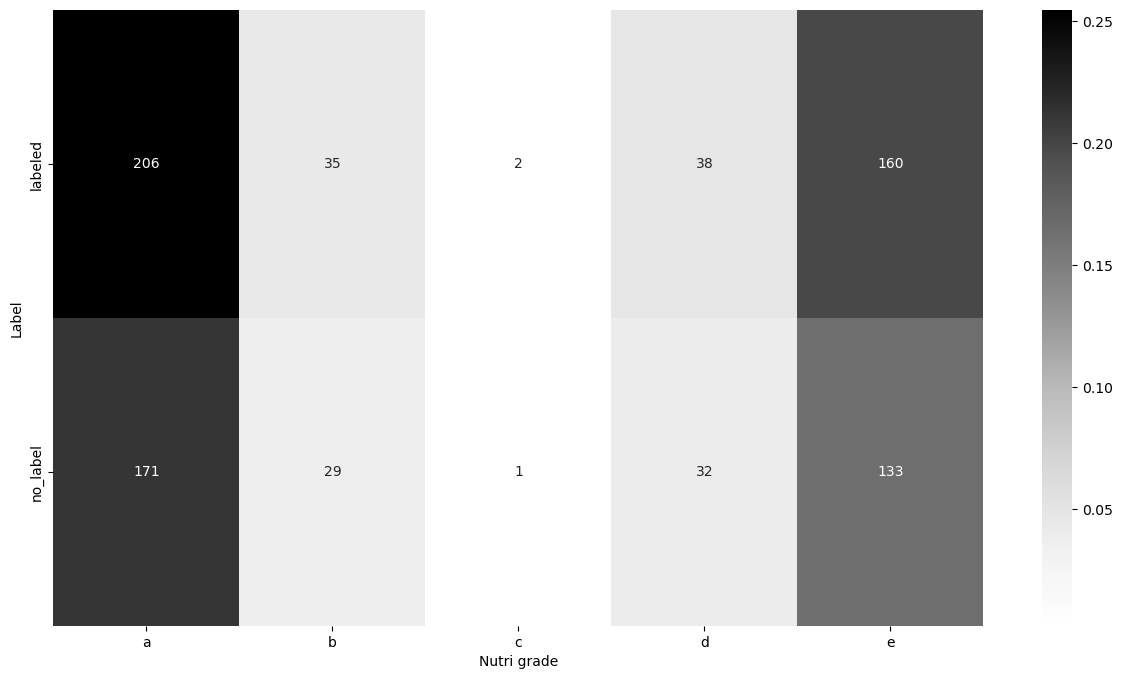

In [72]:
import seaborn as sns
plt.figure(figsize = (15,8))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n #effectifs theoriques Tij :  s'il n y avait pas de lien entre les variables

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = ((c-indep)**2)/indep # ((effectifs-effectifs theoriques)²/effectifs theoriques) 
##############################ou somme des carres des ecrats relativisés soit ki2(tableau) xi_ij
xi_n = measure.sum().sum()#ki2
table = measure/xi_n #tableau contributiobns apres normalistation en divisant par xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=(measure).astype(int).iloc[:-1,:-1], cmap="Greys", cbar=True,fmt='g')
plt.xlabel("Nutri grade",color="k",fontsize=10)
plt.ylabel("Label",color="k",fontsize=10)
#plt.savefig("23.jpg")
plt.show()


#measure = ((c-indep)**2)/indep
#table = measure/xi_n
#xi_n = measure.sum().sum()#xi_n

###table2 = (((c-indep)**2)/indep)/((((c-indep)**2)/indep).sum().sum())#tableau ki2 divisse par le ki2 total = pourcentage
#l'ecart imprtant entre les effectifs observés et theorique laisse penser qu il existe un lien entre les variables

In [48]:
xi_n

810.1849614693169

In [49]:
#ddl = 4 (nb de lignes -1 * nb de colonnes -1)
#X2 critique avec prob d'erreur 5% = 9.49 (pour une erreur associee au rejet de h0)
#X2 critique inferieur au X2 calculé on peut rejetter H0, il existe un lien de dependance entre le nutri grade et le label

In [50]:
indep

nutrition_grade_fr,a,b,c,d,e,Total
labels_fr,,,,,,
labeled,4522.197762,4035.359376,5833.893732,7504.933599,5189.615532,27086.0
no_label,5444.802238,4858.640624,7024.106268,9036.066401,6248.384468,32612.0
Total,9967.000000,8894.000000,12858.000000,16541.000000,11438.000000,59698.0


### "additives_n" et "nutrition_grade_fr"

In [51]:
X = "additives_n"
Y = "nutrition_grade_fr"
df.sort_values(by='nutrition_grade_fr',ascending=True,inplace=True)

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

nutrition_grade_fr,a,b,c,d,e,Total
additives_n,,,,,,
0,7303.0,5633.0,7143.0,9205.0,1396.0,30680
1,1328.0,907.0,1548.0,1659.0,5817.0,11259
2,589.0,682.0,1324.0,1401.0,1184.0,5180
3,270.0,477.0,891.0,1192.0,1066.0,3896
4,160.0,355.0,579.0,816.0,731.0,2641
5,109.0,269.0,471.0,662.0,457.0,1968
6,83.0,170.0,279.0,484.0,284.0,1300
7,40.0,116.0,205.0,363.0,173.0,897
8,27.0,73.0,155.0,251.0,117.0,623


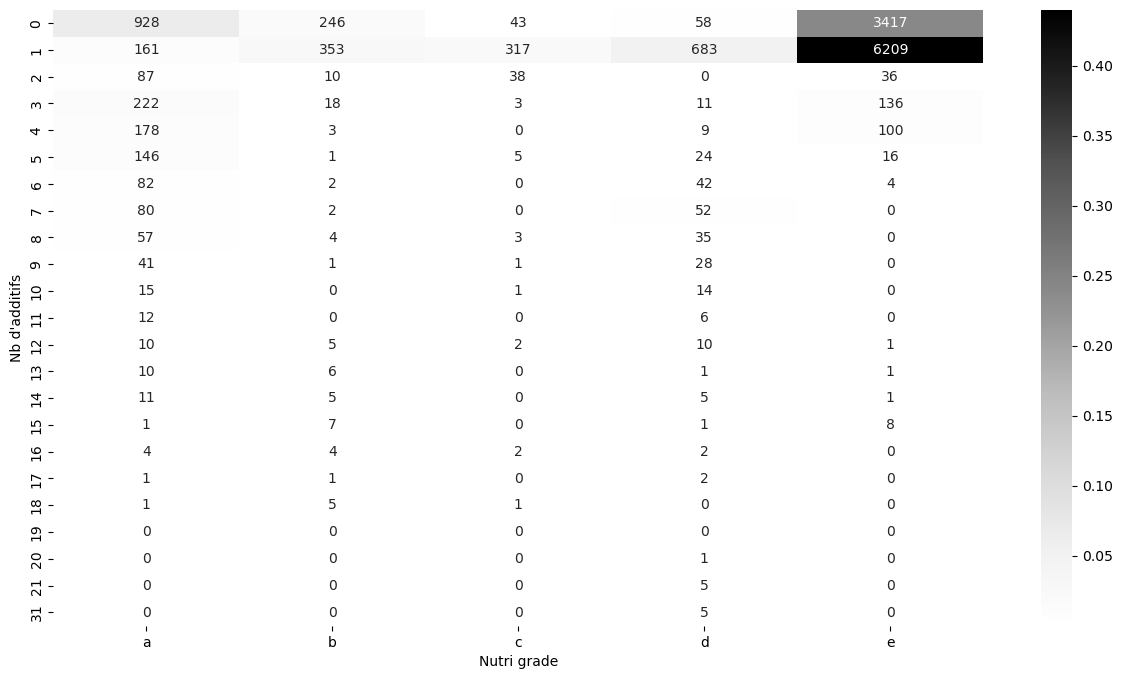

In [52]:
import seaborn as sns
plt.figure(figsize = (15,8))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n #effectifs theoriques Tij :  s'il n y avait pas de lien entre les variables

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = ((c-indep)**2)/indep # ((effectifs-effectifs theoriques)²/effectifs theoriques) 
##############################ou somme des carres des ecrats relativisés soit ki2(tableau) xi_ij
xi_n = measure.sum().sum()#ki2
table = measure/xi_n #tableau contributiobns apres normalistation en divisant par xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=(measure).astype(int).iloc[:-1,:-1], cmap="Greys", cbar=True,fmt='g')
plt.xlabel("Nutri grade",color="k",fontsize=10)
plt.ylabel("Nb d'additifs",color="k",fontsize=10)
#plt.savefig("24.jpg")
plt.show()


#measure = ((c-indep)**2)/indep
#table = measure/xi_n
#xi_n = measure.sum().sum()#xi_n

###table2 = (((c-indep)**2)/indep)/((((c-indep)**2)/indep).sum().sum())#tableau ki2 divisse par le ki2 total = pourcentage
#l'ecart imprtant entre les effectifs observés et theorique laisse penser qu il existe un lien entre les variables

In [53]:
xi_n

14114.231158428829

In [54]:
#ddl = 88 (nb de lignes -1 * nb de colonnes -1) 22x 4
#X2 critique avec prob d'erreur 5% = 113 (pour une erreur associee au rejet de h0)
#X2 critique inferieur au X2 calculé on peut rejetter H0, il existe un lien de dependance entre le nutri grade et le label

In [55]:
indep

nutrition_grade_fr,a,b,c,d,e,Total
additives_n,,,,,,
0,5122.241281,4570.805052,6607.984187,8500.751784,5878.217696,30680.0
1,1879.769054,1677.402024,2425.009582,3119.620741,2157.198600,11259.0
2,864.837348,771.733056,1115.689638,1435.263828,992.476130,5180.0
3,650.464538,580.438608,839.136453,1079.495729,746.464672,3896.0
4,440.933482,393.464672,568.829408,731.762890,506.009548,2641.0
5,328.571409,293.198968,423.875909,545.289423,377.064290,1968.0
6,217.044122,193.678180,279.999330,360.201347,249.077021,1300.0
7,149.760444,133.637944,193.199538,248.538929,171.863144,897.0
8,104.014222,92.816543,134.184294,172.619568,119.365372,623.0


# ACP

In [56]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [57]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler


acp_vars = ['energy_100g','fat_100g','saturated-fat_100g',
            'carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']

X = df[acp_vars].dropna()
keep_ind = X.index
X = StandardScaler().fit_transform(X)

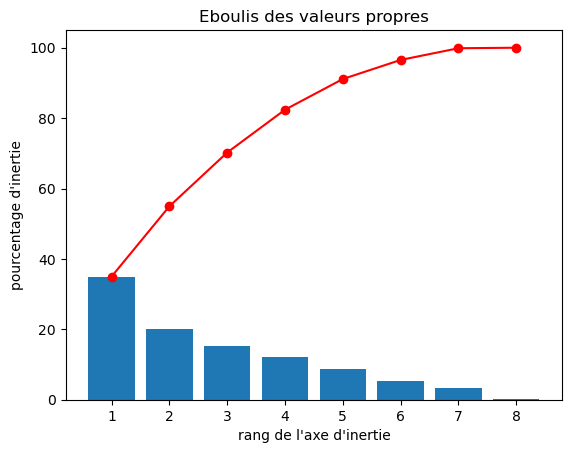

In [58]:
pca = decomposition.PCA(n_components=len(acp_vars))
pca.fit(X)
X = pca.transform(X)

display_scree_plot(pca)
#plt.savefig("25.jpg")

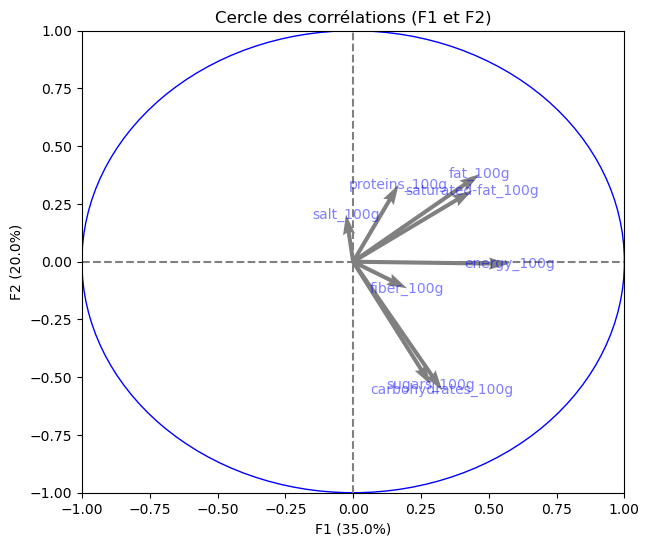

In [59]:
pcs = pca.components_
display_circles(pcs, 3, pca, [(0,1),(2,3),(4,5)], labels = np.array(acp_vars))
#plt.savefig("26.jpg");

In [60]:
acp_df = pd.DataFrame(X)
acp_df.index = keep_ind
acp_df['nutrition_grade_fr'] = df.loc[keep_ind, 'nutrition_grade_fr']
acp_df['labels_fr'] = df.loc[keep_ind, 'labels_fr']

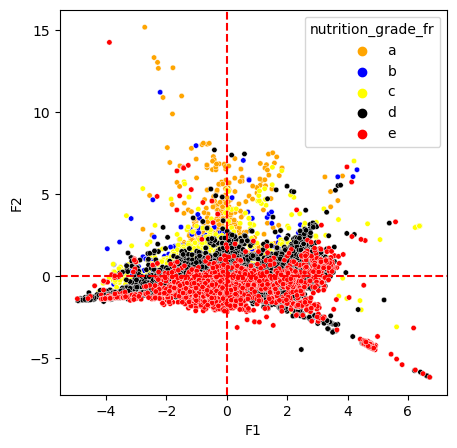

In [69]:
x = acp_df[1]
y = acp_df[2]
fig, scatter = plt.subplots(figsize = (5,5), dpi = 100)
scatter = sns.scatterplot(x = x, y =y, data=acp_df, hue='nutrition_grade_fr',s=15 )
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x = 0, color = 'r', linestyle='--')
plt.xlabel("F1")
plt.ylabel("F2");
#plt.savefig("27.jpg");

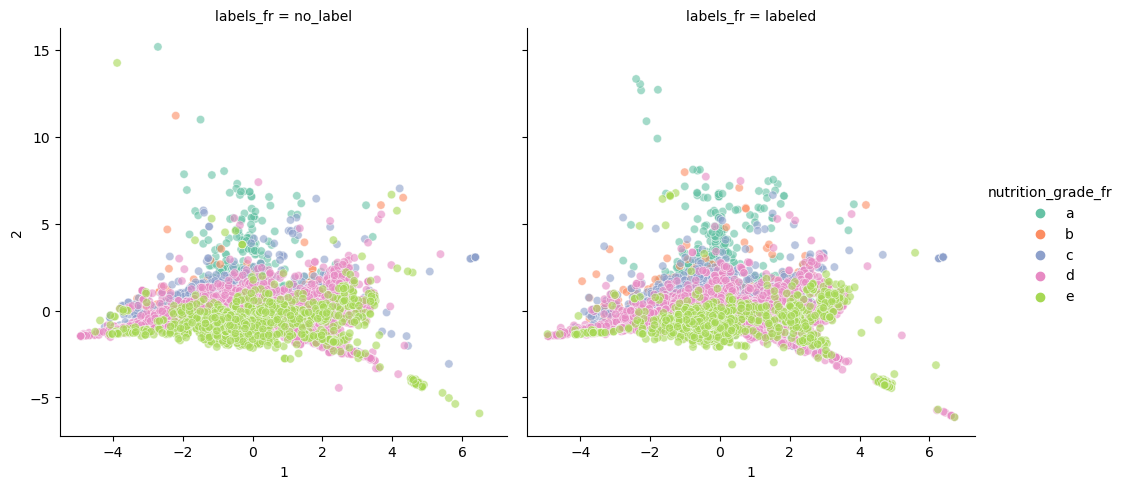

In [62]:
plt.rcParams["figure.figsize"]=[9,6]
sns.relplot(x=1, y=2,data=acp_df,col='labels_fr', col_wrap=2, alpha=.6, palette='Set2',hue='nutrition_grade_fr')
#plt.title('Analyse bivariée height_right et length')
plt.draw()

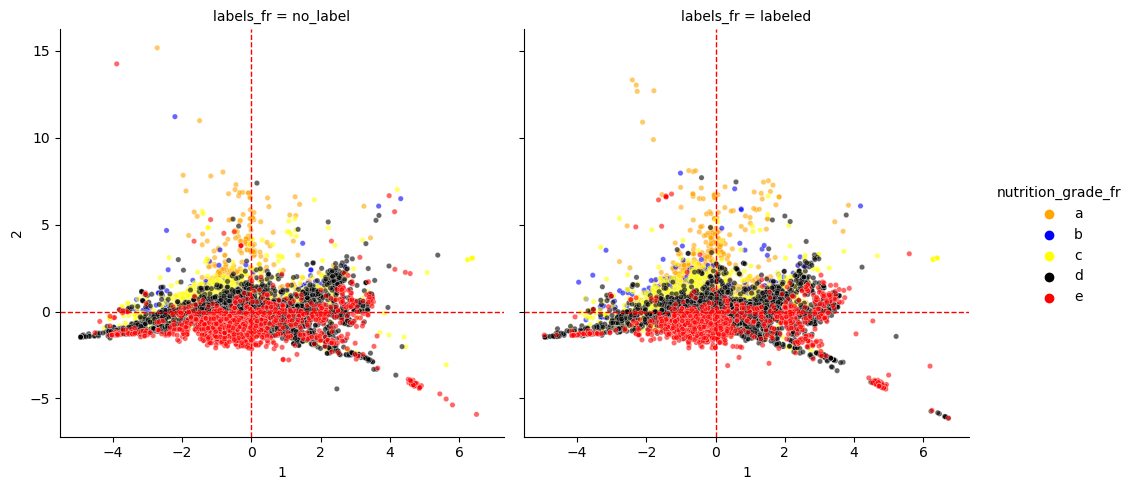

In [63]:
plt.rcParams["figure.figsize"]=[9,6]
colors = [ 'orange', 'blue', 'yellow','black','red']
#colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))


g = sns.relplot(x=1, y=2,data=acp_df,col='labels_fr', alpha=.6,hue='nutrition_grade_fr', s=15)

#plt.axhline(0, ls='--', linewidth=1, color='red')
g.refline(x=0,color = "red",lw = 1)
g.refline(y = 0,color = "red",lw = 1)
#plt.title('Analyse bivariée height_right et length')
plt.draw()
#plt.savefig("biv_height_right_length.jpg",bbox="tight")

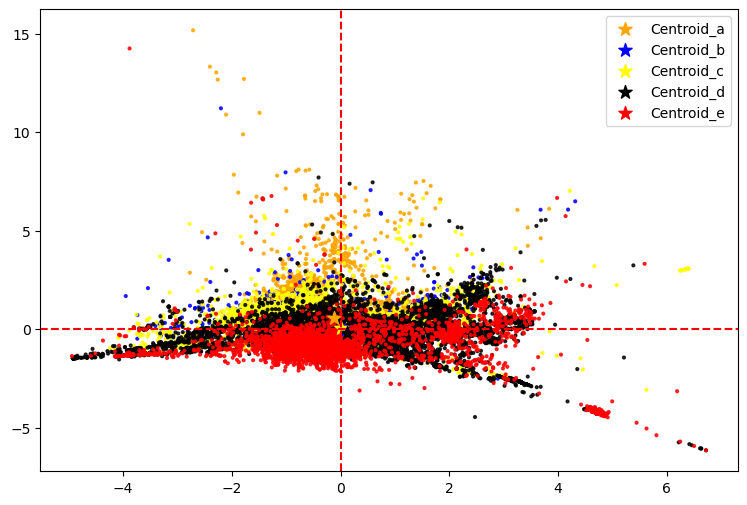

In [64]:
fig, ax = plt.subplots()
colors = {'e':'red', 'a':'orange', 'b':'blue', 'c':'yellow','d':'black'}
g = ax.scatter(acp_df[1], acp_df[2], alpha=.8, c=acp_df['nutrition_grade_fr'].map(colors),s=4)
plt.scatter(acp_df[acp_df["nutrition_grade_fr"] == "a"][1].mean(), acp_df[acp_df["nutrition_grade_fr"] == "a"][2].mean(), color='orange',marker = '*',s=100, label = 'Centroid_a' )
plt.scatter(acp_df[acp_df["nutrition_grade_fr"] == "b"][1].mean(), acp_df[acp_df["nutrition_grade_fr"] == "b"][2].mean(), color='blue',marker = '*',s=100, label = 'Centroid_b' )
plt.scatter(acp_df[acp_df["nutrition_grade_fr"] == "c"][1].mean(), acp_df[acp_df["nutrition_grade_fr"] == "c"][2].mean(), color='yellow',marker = '*',s=100, label = 'Centroid_c' )
plt.scatter(acp_df[acp_df["nutrition_grade_fr"] == "d"][1].mean(), acp_df[acp_df["nutrition_grade_fr"] == "d"][2].mean(), color='black',marker = '*',s=100, label = 'Centroid_d' )
plt.scatter(acp_df[acp_df["nutrition_grade_fr"] == "e"][1].mean(), acp_df[acp_df["nutrition_grade_fr"] == "e"][2].mean(), color='red',marker = '*',s=100, label = 'Centroid_e' )
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x = 0, color = 'r', linestyle='--')
#g.refline(x=0,color = "red",lw = 1)
#g.refline(y = 0,color = "red",lw = 1)
plt.legend()
plt.show()

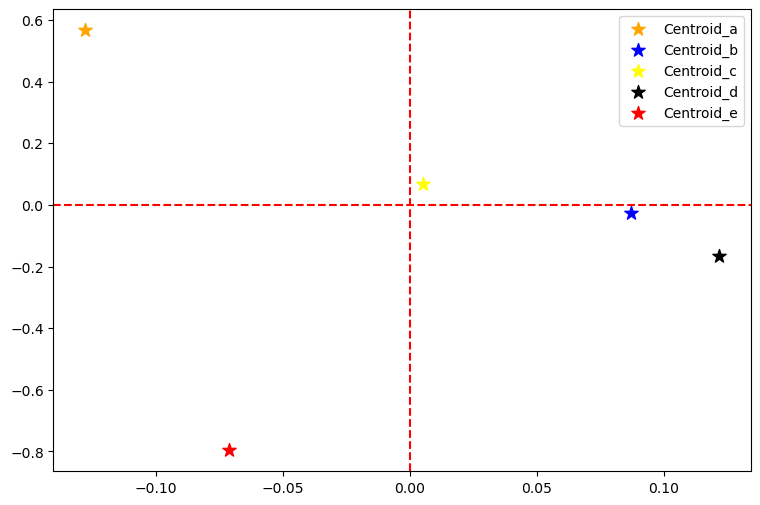

In [65]:
fig, ax = plt.subplots()
plt.scatter(acp_df[acp_df["nutrition_grade_fr"] == "a"][1].mean(), acp_df[acp_df["nutrition_grade_fr"] == "a"][2].mean(), color='orange',marker = '*',s=100, label = 'Centroid_a' )
plt.scatter(acp_df[acp_df["nutrition_grade_fr"] == "b"][1].mean(), acp_df[acp_df["nutrition_grade_fr"] == "b"][2].mean(), color='blue',marker = '*',s=100, label = 'Centroid_b' )
plt.scatter(acp_df[acp_df["nutrition_grade_fr"] == "c"][1].mean(), acp_df[acp_df["nutrition_grade_fr"] == "c"][2].mean(), color='yellow',marker = '*',s=100, label = 'Centroid_c' )
plt.scatter(acp_df[acp_df["nutrition_grade_fr"] == "d"][1].mean(), acp_df[acp_df["nutrition_grade_fr"] == "d"][2].mean(), color='black',marker = '*',s=100, label = 'Centroid_d' )
plt.scatter(acp_df[acp_df["nutrition_grade_fr"] == "e"][1].mean(), acp_df[acp_df["nutrition_grade_fr"] == "e"][2].mean(), color='red',marker = '*',s=100, label = 'Centroid_e' )
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x = 0, color = 'r', linestyle='--')
plt.legend()
plt.show()